In [43]:
# Importing useful libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')


In [44]:
# Importing some scripts

from scripts.data_visualization import Data_Viz 
from scripts.data_cleaning import DataCleaner


In [45]:
# Reading the merged dataset

clean_merged_data = pd.read_excel(r'..\data\clean_merged_data.xlsx')
clean_merged_data.head()

,Call status,Month,Offer Trader Name,Enrolment Path Classifier,Enrolment Type,Offer Trader County Name,Offer Trader Business Organisation,Offer Redemption Date,Service Type,Actor Role,Tiko Amount
0,Not reachable,June,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,2024-06-26 12:14:28,OC,Agent,125
1,Not reachable,June,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,2024-06-26 12:14:28,OC,Provider,150
2,Not reachable,June,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,2024-06-26 12:14:28,OC,Rafiki,60
3,Not reachable,June,Doruex Medicare Centre,SMS - Low Tech,Enrolment With Mobiliser,Busia,Rhn,2024-06-26 12:15:45,IMP,Agent,50
4,Not reachable,June,Doruex Medicare Centre,SMS - Low Tech,Enrolment With Mobiliser,Busia,Rhn,2024-06-26 12:15:45,IMP,Provider,690


In [46]:
# Checking the data

clean_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Call status                         4075 non-null   object        
 1   Month                               4075 non-null   object        
 2   Offer Trader Name                   4075 non-null   object        
 3   Enrolment Path Classifier           4075 non-null   object        
 4   Enrolment Type                      4075 non-null   object        
 5   Offer Trader County Name            4075 non-null   object        
 6   Offer Trader Business Organisation  4075 non-null   object        
 7   Offer Redemption Date               4075 non-null   datetime64[ns]
 8   Service Type                        4075 non-null   object        
 9   Actor Role                          4075 non-null   object        
 10  Tiko Amount             

In [47]:
clean_merged_data.isnull().sum()

Call status                           0
Month                                 0
Offer Trader Name                     0
Enrolment Path Classifier             0
Enrolment Type                        0
Offer Trader County Name              0
Offer Trader Business Organisation    0
Offer Redemption Date                 0
Service Type                          0
Actor Role                            0
Tiko Amount                           0
dtype: int64

In [48]:
# Statistics summary

clean_merged_data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Call status,4075,6,Not reachable,3485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,4075,3,June,4064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Trader Name,4075,101,Kware Dispensary,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enrolment Path Classifier,4075,4,SMS - Low Tech,4063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enrolment Type,4075,3,Enrolment With Mobiliser,3806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Trader County Name,4075,12,Nairobi,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Trader Business Organisation,4075,10,Public Sector Facilities,1110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Redemption Date,4075,NaN,NaN,NaN,2024-06-28 12:49:47.179140864,2024-06-26 08:30:14,2024-06-27 12:56:46,2024-06-28 13:00:15,2024-06-29 13:22:52,2024-06-30 23:31:06,NaN
Service Type,4075,9,OC,1690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actor Role,4075,3,Provider,1499,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Call Outcomes:
Call status
Not reachable      3485
Call successful     237
No answer           173
Call later          130
Call rejected        26
Wrong recipient      24
Name: count, dtype: int64
Enrolment Methods:
Enrolment Path Classifier
SMS - Low Tech          4063
WhatsApp - High Tech       6
Tiko Card - No Tech        3
API - High Tech            3
Name: count, dtype: int64


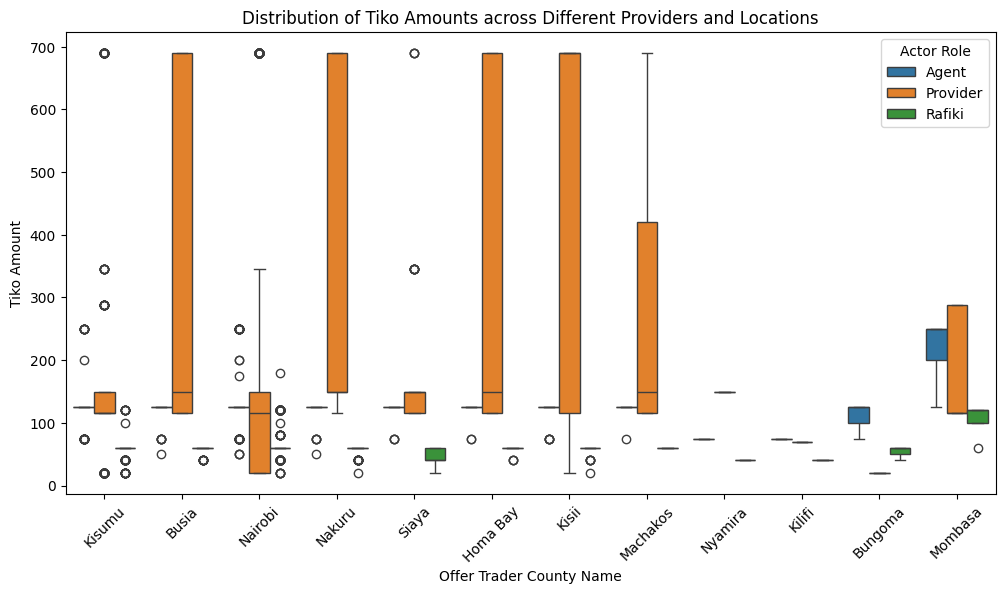

<Figure size 640x480 with 0 Axes>

In [49]:
# Analyzing call outcomes
call_outcomes = clean_merged_data['Call status'].value_counts()
print('Call Outcomes:')
print(call_outcomes)

# Identifying trends in enrolment methods
enrolment_methods = clean_merged_data['Enrolment Path Classifier'].value_counts()
print('Enrolment Methods:')
print(enrolment_methods)

# Understanding the distribution of Tiko amounts across different providers and locations
plt.figure(figsize=(12, 6))
sns.boxplot(x='Offer Trader County Name', y='Tiko Amount', hue='Actor Role', data=clean_merged_data)
plt.title('Distribution of Tiko Amounts across Different Providers and Locations')
plt.xticks(rotation=45)
plt.show()

# Saving the plot
plt.savefig('../charts/tiko_amounts_distribution.jpg')


Insights

1. Call Outcomes: The majority of calls were "Not reachable" (3,485), followed by "Call successful" (237) and "No answer" (173). This suggests that there might be challenges in reaching the intended recipients, which could impact the effectiveness of the program.
2. Enrolment Methods: The data shows a strong preference for the "SMS - Low Tech" enrolment method, with 4,063 entries. Other methods like "WhatsApp - High Tech", "Tiko Card - No Tech", and "API - High Tech" have very low usage (6, 3, and 3 entries respectively). This indicates that the SMS-based enrolment is the most popular or accessible method for participants.
3. Distribution of Tiko Amounts: The boxplot shows the distribution of Tiko amounts across different counties and actor roles. Key observations:

- There's significant variation in Tiko amounts both across counties and actor roles.
- Some counties (e.g., Kisumu, Busia) show higher median Tiko amounts compared to others.
- Within counties, there are differences in Tiko amounts between different actor roles (Agent, Provider, Rafiki).
- There are several outliers, particularly for the Provider role in some counties, indicating some exceptionally high Tiko amounts.

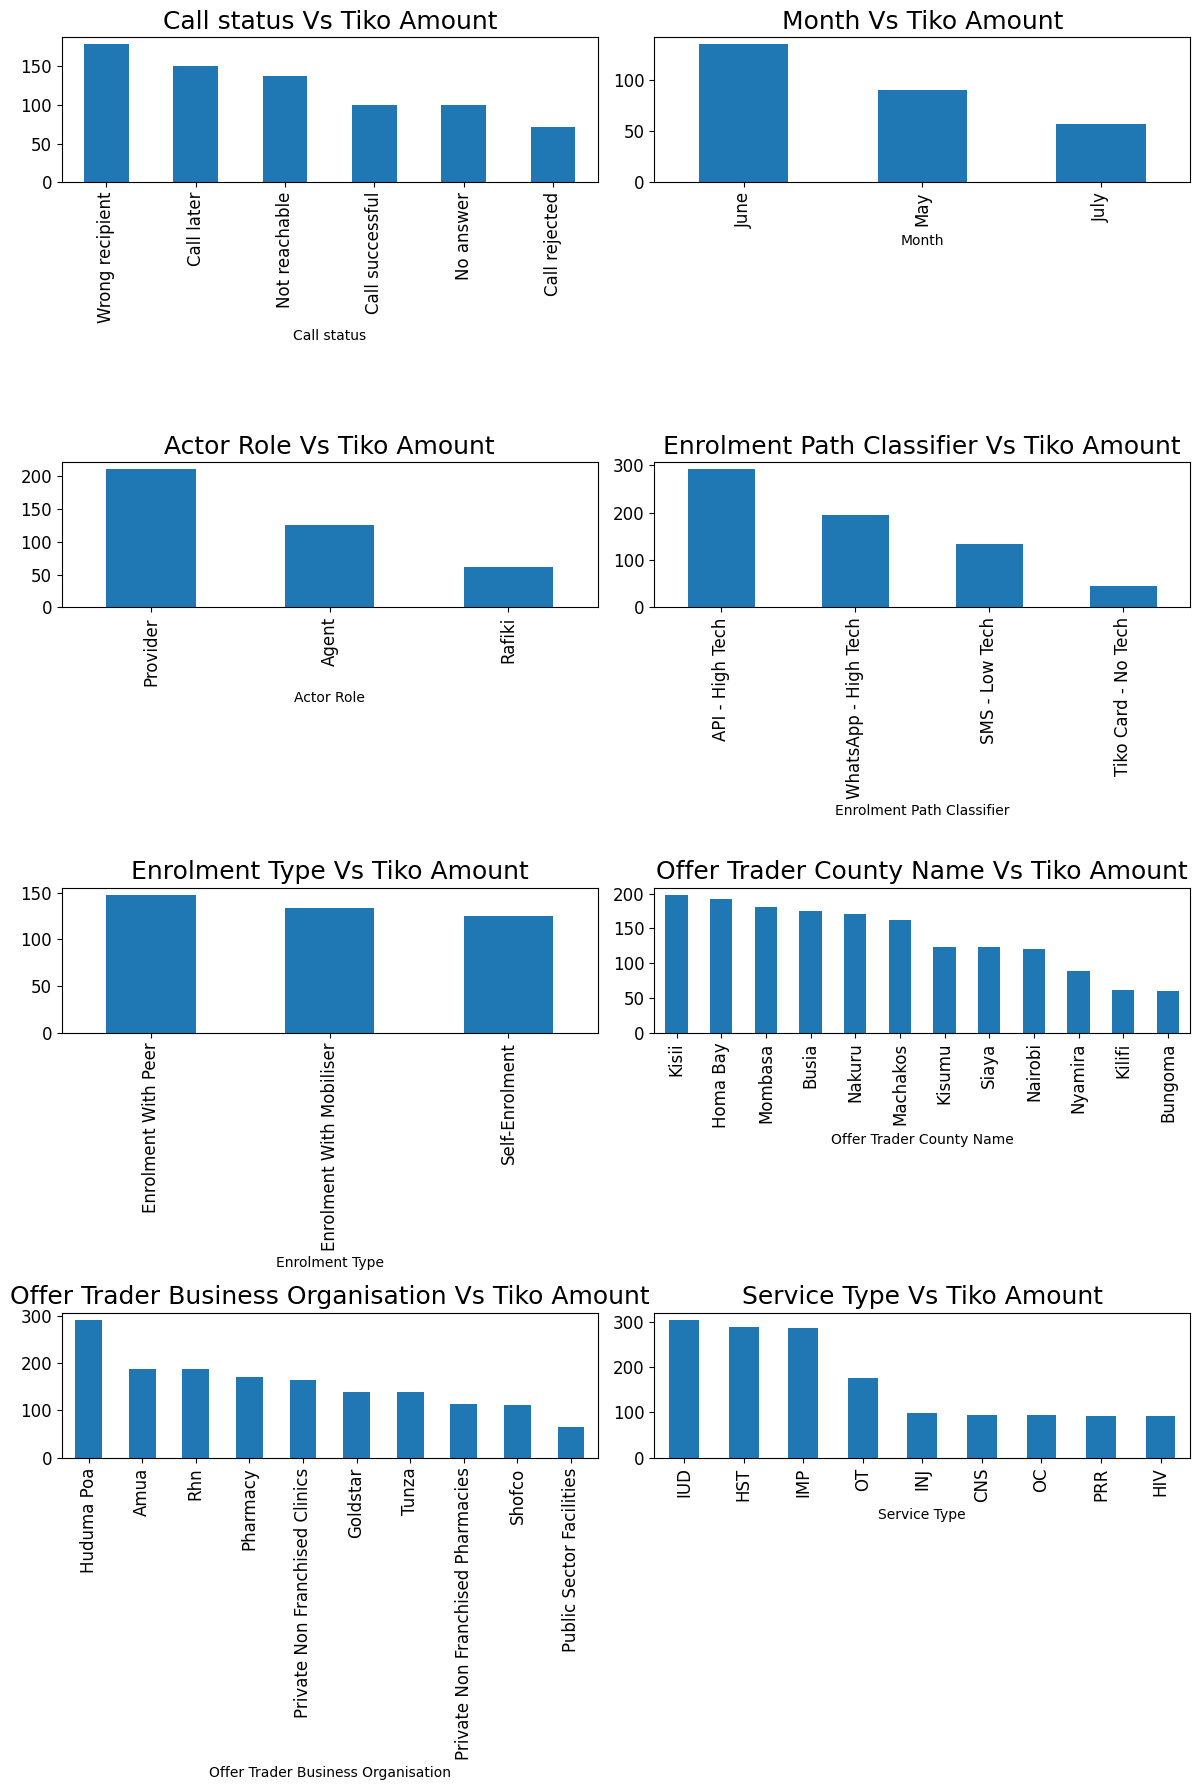

In [50]:
# A bar plot to show the relationship between the Categorical variables and tik0 amount 

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
clean_merged_data.groupby('Call status')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Call status Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Month')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Month Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Actor Role')['Tiko Amount'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Actor Role Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Enrolment Path Classifier')['Tiko Amount'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Enrolment Path Classifier Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Enrolment Type')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Enrolment Type Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Offer Trader County Name')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Offer Trader County Name Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Offer Trader Business Organisation')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Offer Trader Business Organisation Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Service Type')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Service Type Vs Tiko Amount", fontsize=18)

plt.tight_layout()
plt.savefig(r"..\charts\average_sales_analysis.jpg")
plt.show()

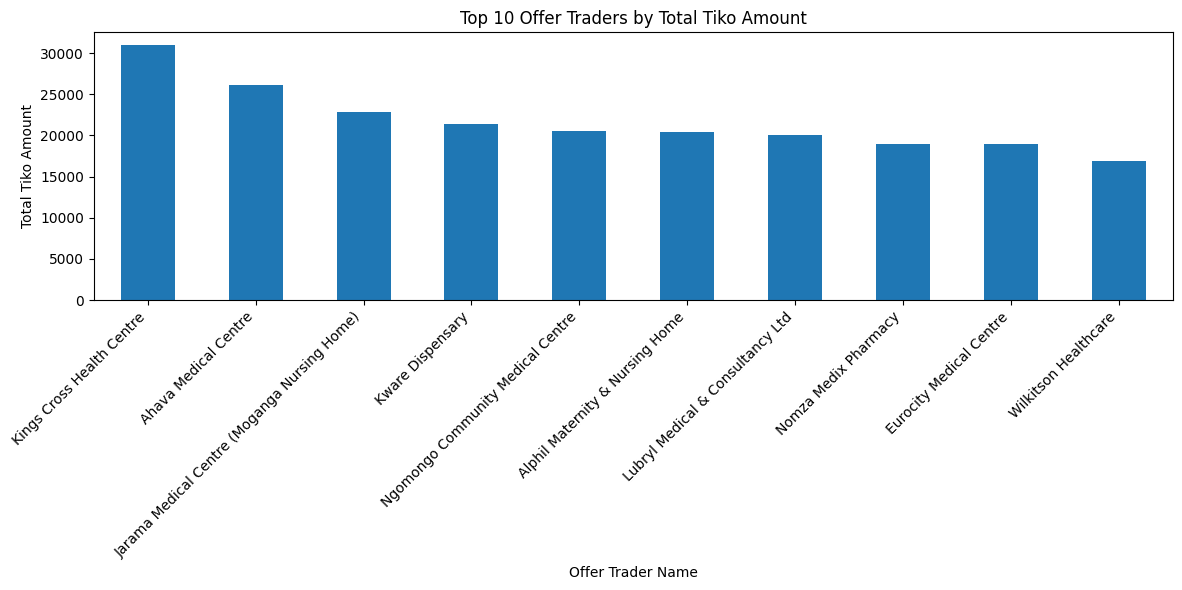

In [63]:
# Top 10 Offer Traders by total Tiko Amount
top_traders = clean_merged_data.groupby('Offer Trader Name')['Tiko Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_traders.plot(kind='bar')
plt.title('Top 10 Offer Traders by Total Tiko Amount')
plt.xlabel('Offer Trader Name')
plt.ylabel('Total Tiko Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../charts/top_10_traders.jpg')
plt.show()


Analysing mean Tiko Amounts

In [51]:
# Further analysis to investigate the reasons behind the high number of unreachable calls, explore the dominance of SMS enrolment method, and analyze the factors contributing to variations in Tiko amounts.

# Investigate reasons behind unreachable calls
unreachable_calls = clean_merged_data[clean_merged_data['Call status'] == 'Not reachable']
print('Unreachable Calls Analysis:')
print(unreachable_calls.describe())


Unreachable Calls Analysis:
               Offer Redemption Date  Tiko Amount
count                           3485  3485.000000
mean   2024-06-28 13:07:55.658823424   137.819799
min              2024-06-26 08:30:14    20.000000
25%              2024-06-27 13:06:49    60.000000
50%              2024-06-28 13:14:34   115.000000
75%              2024-06-29 13:22:52   125.000000
max              2024-06-30 23:31:06   690.000000
std                              NaN   156.994309


1. The analysis shows that there were 3,485 unreachable calls. The mean Tiko Amount for these calls was approximately 137.82, with a minimum of 20 and a maximum of 125 (75th percentile). This suggests that unreachable calls are not limited to any specific Tiko Amount range.

In [52]:
# Explore the dominance of SMS enrolment method
enrolment_sms = clean_merged_data[clean_merged_data['Enrolment Path Classifier'] == 'SMS - Low Tech']
print('SMS Enrolment Analysis:')
print(enrolment_sms.describe())


SMS Enrolment Analysis:
               Offer Redemption Date  Tiko Amount
count                           4063  4063.000000
mean   2024-06-28 12:50:27.104848384   134.102141
min              2024-06-26 08:30:14    20.000000
25%              2024-06-27 12:56:46    60.000000
50%              2024-06-28 13:02:13   115.000000
75%              2024-06-29 13:22:52   125.000000
max              2024-06-30 23:31:06   690.000000
std                              NaN   153.090412


2. There were 4,063 enrollments through SMS. The mean Tiko Amount for SMS enrollments was about 134.10, which is similar to the overall mean for unreachable calls. This suggests that the SMS method is used across various Tiko Amount levels.

In [53]:
# Analyze factors contributing to variations in Tiko amounts
# Group by county and actor role to see the mean Tiko amounts
mean_tiko_amounts = clean_merged_data.groupby(['Offer Trader County Name', 'Actor Role'])['Tiko Amount'].mean().reset_index()
print('Mean Tiko Amounts by County and Actor Role:')
print(mean_tiko_amounts)


Mean Tiko Amounts by County and Actor Role:
   Offer Trader County Name Actor Role  Tiko Amount
0                   Bungoma      Agent   108.333333
1                   Bungoma   Provider    20.000000
2                   Bungoma     Rafiki    53.333333
3                     Busia      Agent   116.875000
4                     Busia   Provider   327.745098
5                     Busia     Rafiki    55.652174
6                  Homa Bay      Agent   119.444444
7                  Homa Bay   Provider   344.043478
8                  Homa Bay     Rafiki    56.250000
9                    Kilifi      Agent    75.000000
10                   Kilifi   Provider    70.000000
11                   Kilifi     Rafiki    40.000000
12                    Kisii      Agent   122.619048
13                    Kisii   Provider   409.906542
14                    Kisii     Rafiki    58.653846
15                   Kisumu      Agent   124.899598
16                   Kisumu   Provider   182.568182
17                  

3. This analysis reveals significant variations in mean Tiko Amounts across counties and actor roles. For example:

- In Bungoma, Agents have a higher mean Tiko Amount (108.33) compared to Providers (20.00) and Rafiki (53.33).
- In Busia, Providers have a much higher mean Tiko Amount (327.75) compared to Agents (116.88) and Rafiki (55.65).

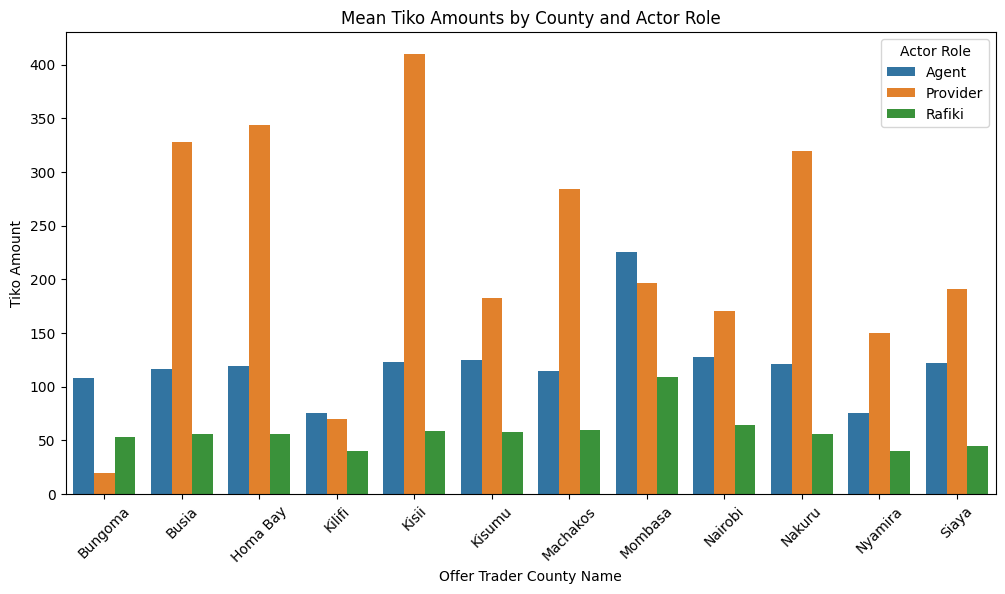

<Figure size 640x480 with 0 Axes>

In [54]:
# Visualize the mean Tiko amounts
plt.figure(figsize=(12, 6))
sns.barplot(x='Offer Trader County Name', y='Tiko Amount', hue='Actor Role', data=mean_tiko_amounts)
plt.title('Mean Tiko Amounts by County and Actor Role')
plt.xticks(rotation=45)
plt.show()

# Save the plot
plt.savefig('../charts/mean_tiko_amounts.jpg')


4. The bar plot visualizes the mean Tiko Amounts by county and actor role, clearly showing the variations across different locations and roles.